In [ ]:
!pip install opencv-python

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import random
import numpy as np
import cv2
import pandas as pd

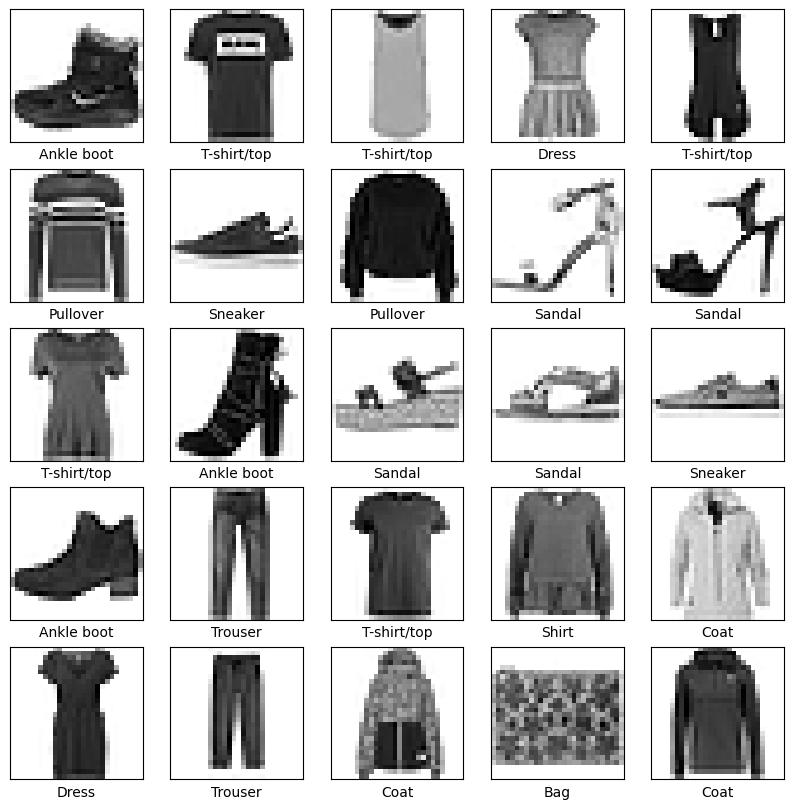

In [ ]:
#Display the before & after image(s) used in the task below.
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define the class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display some images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


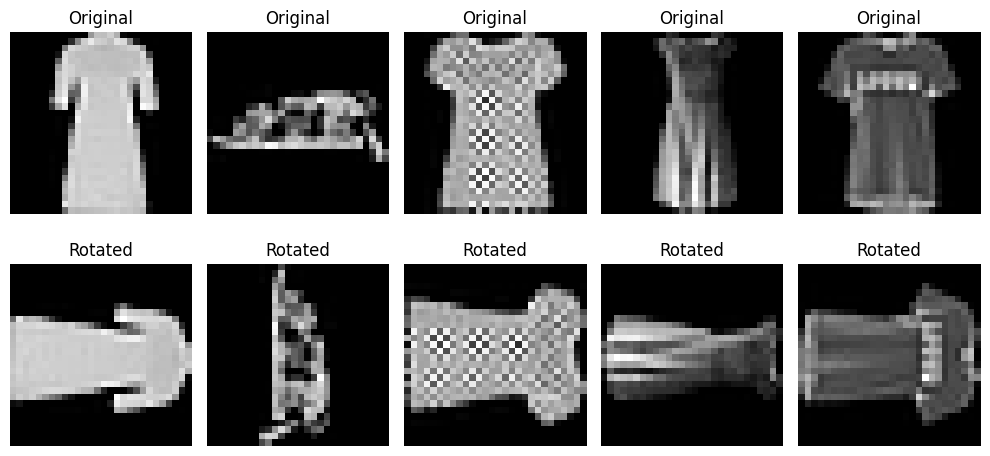

   Mean Intensity Before Rotation  Mean Intensity After Rotation
0                       87.875000                      87.875000
1                       28.641582                      28.641582
2                       92.468112                      92.468112
3                       36.637755                      36.637755
4                       48.119898                      48.119898


In [ ]:
#Rotation:
# Select a random sample of images
indices = np.random.randint(0, len(x_train), 5)

# Create a table to store the results
results = []

# Display the original images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    original_image = x_train[idx]
    plt.subplot(2, 5, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Apply transformation (rotate by 45 degrees)
    rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)

    # Calculate the mean pixel intensity before and after rotation
    mean_intensity_before = np.mean(original_image)
    mean_intensity_after = np.mean(rotated_image)

    # Add the results to the table
    results.append([mean_intensity_before, mean_intensity_after])

    # Display the transformed images
    plt.subplot(2, 5, i + 6)
    plt.imshow(rotated_image, cmap='gray')
    plt.axis('off')
    plt.title('Rotated')
plt.tight_layout()
plt.show()

# Display the table
import pandas as pd
df = pd.DataFrame(results, columns=['Mean Intensity Before Rotation', 'Mean Intensity After Rotation'])
print(df)

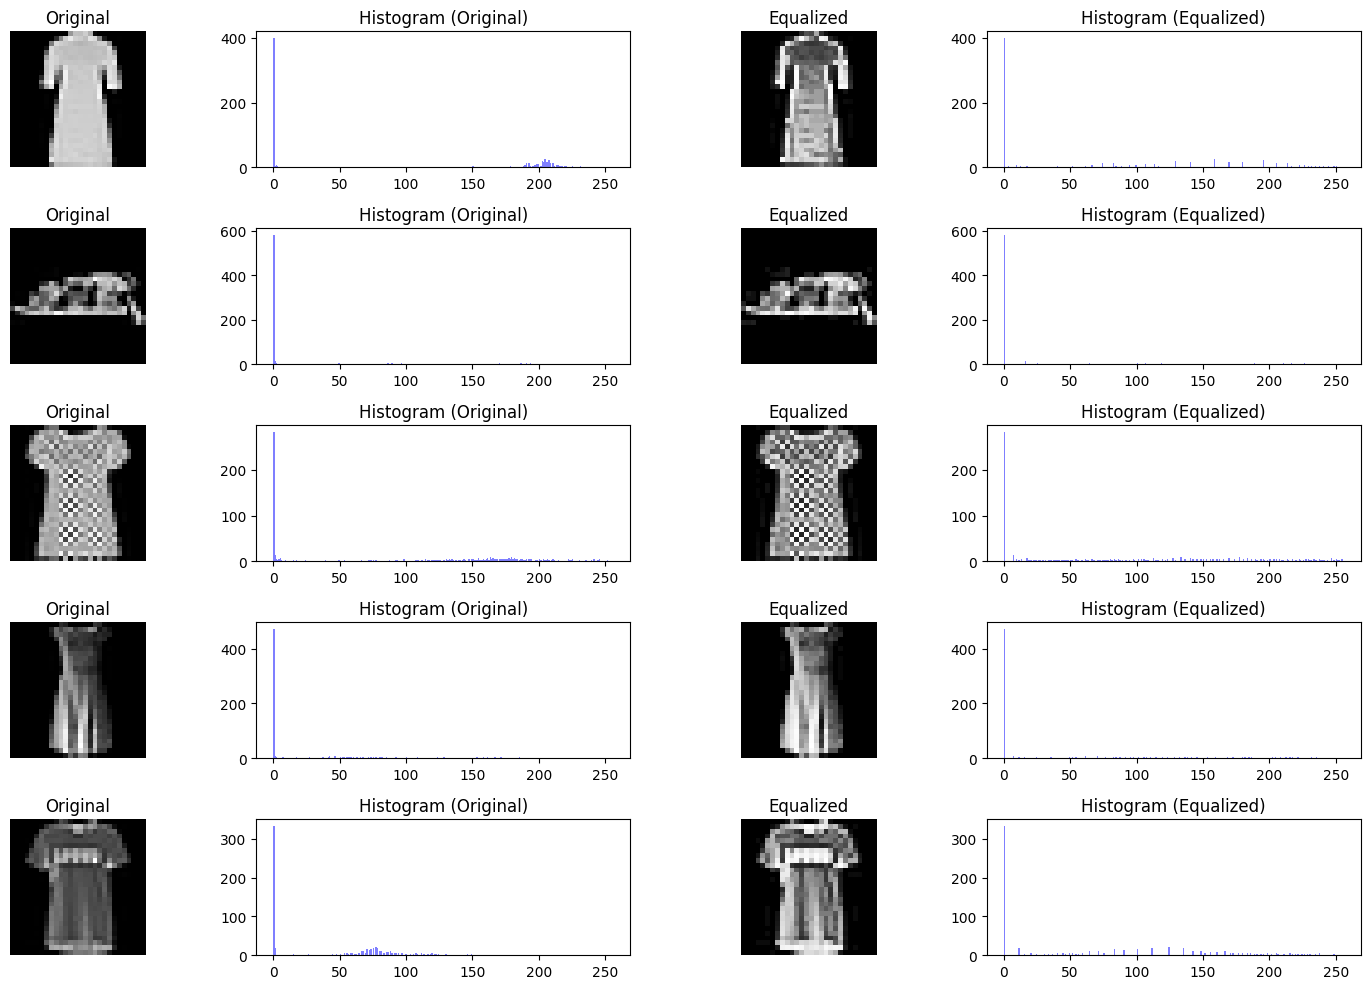

In [ ]:
#Histogram Equalization:
# Display the original images and histograms
plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    original_image = x_train[idx]

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(original_image)

    # Apply histogram stretching
    min_intensity = np.min(original_image)
    max_intensity = np.max(original_image)
    stretched_image = (original_image - min_intensity) * (255 / (max_intensity - min_intensity))
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)

    # Display the original image
    plt.subplot(5, 4, i * 4 + 1)
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Display the histogram of the original image
    plt.subplot(5, 4, i * 4 + 2)
    plt.hist(original_image.flatten(), bins=256, range=(0, 256), color='b', alpha=0.5)
    plt.title('Histogram (Original)')

    # Display the equalized image
    plt.subplot(5, 4, i * 4 + 3)
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')
    plt.title('Equalized')

    # Display the histogram of the equalized image
    plt.subplot(5, 4, i * 4 + 4)
    plt.hist(equalized_image.flatten(), bins=256, range=(0, 256), color='b', alpha=0.5)
    plt.title('Histogram (Equalized)')

plt.tight_layout()
plt.show()

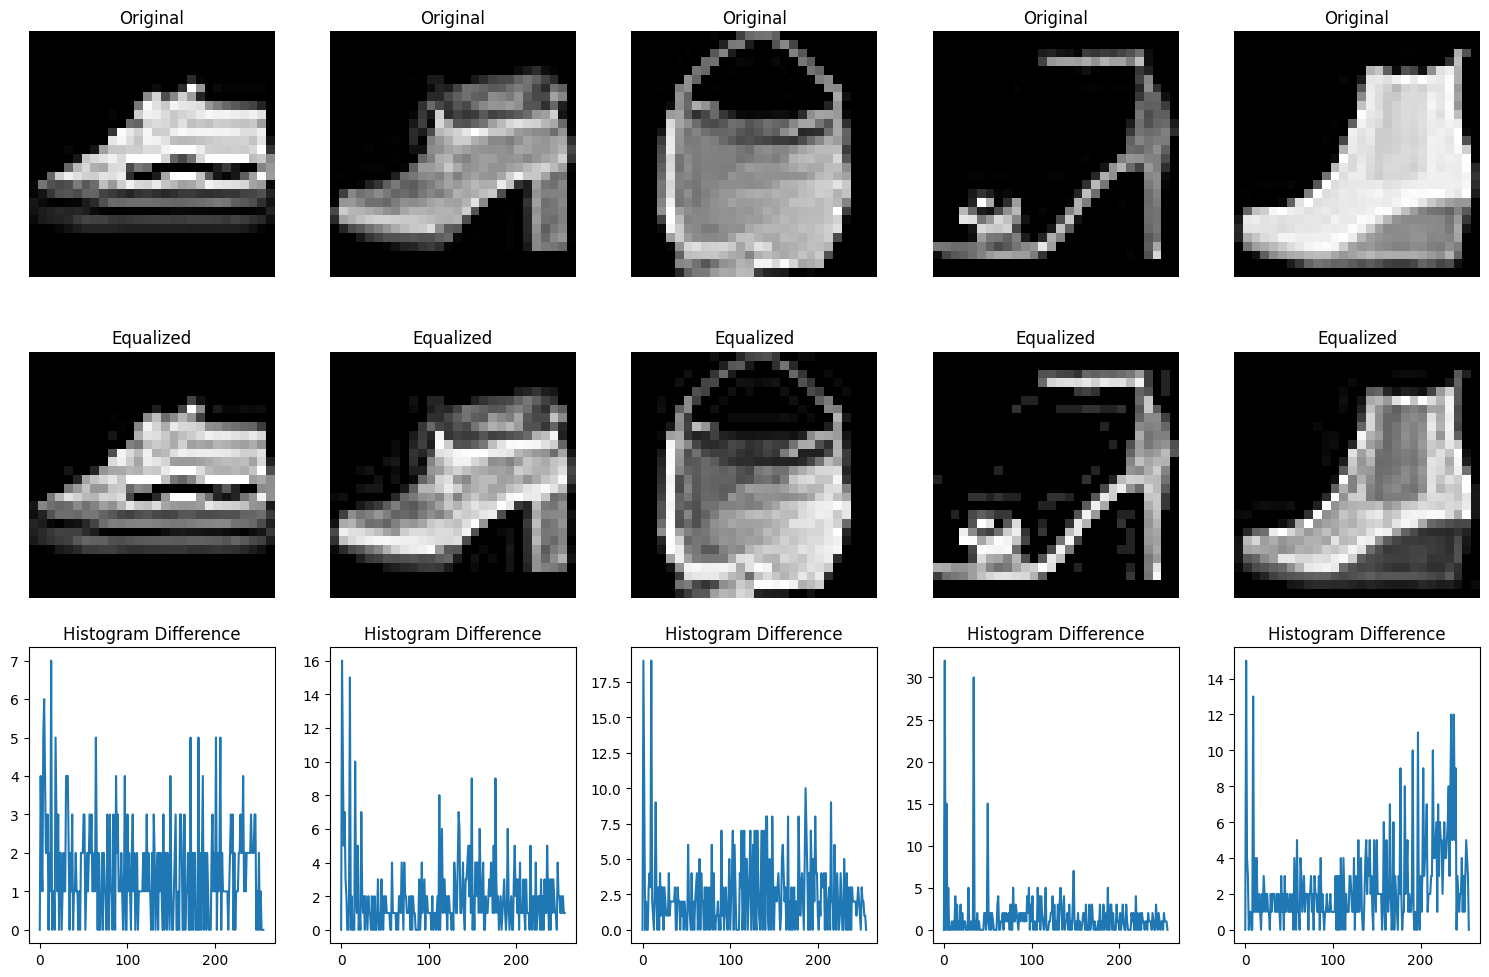

   Mean Histogram Difference Conclusion
0                   1.507812  Increased
1                   1.898438  Increased
2                   2.460938  Increased
3                   1.500000  Increased
4                   2.500000  Increased


In [ ]:
# Select a random sample of images
indices = np.random.randint(0, len(x_train), 5)

# Create a table to store the results
results = []

# Display the original images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    original_image = x_train[idx]
    plt.subplot(3, 5, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Perform histogram equalization
    equalized_image = cv2.equalizeHist(original_image)

    # Display the images after histogram equalization
    plt.subplot(3, 5, i + 6)
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')
    plt.title('Equalized')

    # Calculate the histograms of the original and equalized images
    hist_original = cv2.calcHist([original_image], [0], None, [256], [0, 256])
    hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

    # Calculate the absolute difference in histograms
    hist_diff = np.abs(hist_original - hist_equalized)

    # Display the difference in histograms
    plt.subplot(3, 5, i + 11)
    plt.plot(hist_diff)
    plt.title('Histogram Difference')

    # Add the results to the table
    results.append([np.mean(hist_diff)])

plt.tight_layout()
plt.show()

# Create a DataFrame to display the results
df = pd.DataFrame(results, columns=['Mean Histogram Difference'])

# Add a conclusion based on the histogram difference
df['Conclusion'] = np.where(df['Mean Histogram Difference'] > 0, 'Increased', 'Decreased')

print(df)


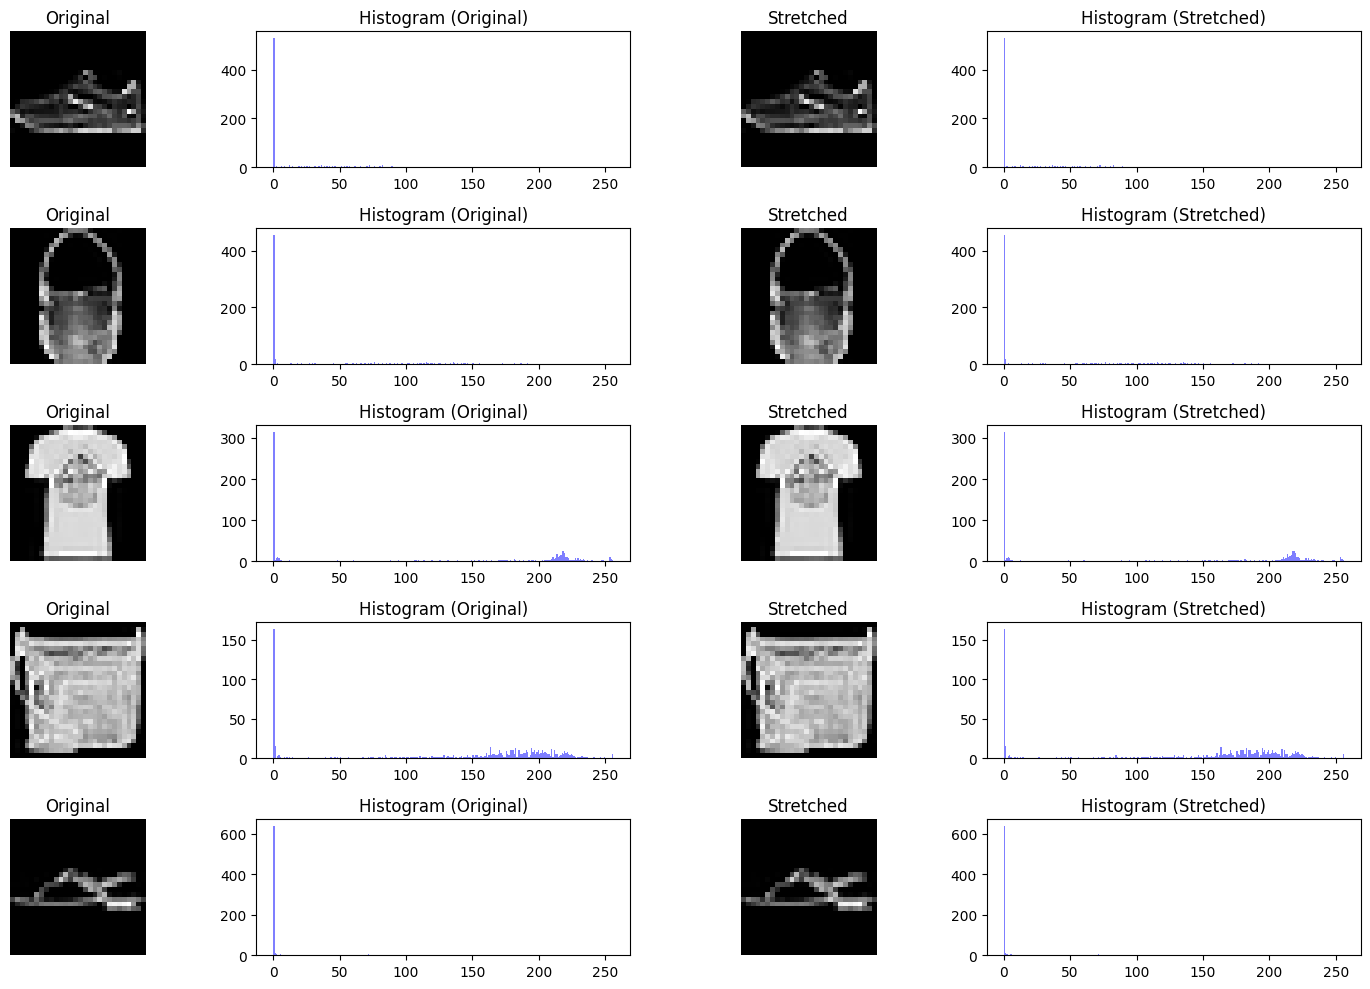

In [ ]:
#Histogram Streching:
# Select a random sample of images
indices = np.random.randint(0, len(x_train), 5)

# Display the original images and histograms
plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    original_image = x_train[idx]

    # Apply histogram stretching
    min_intensity = np.min(original_image)
    max_intensity = np.max(original_image)
    stretched_image = (original_image - min_intensity) * (255 / (max_intensity - min_intensity))
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)

    # Display the original image
    plt.subplot(5, 4, i * 4 + 1)
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Display the histogram of the original image
    plt.subplot(5, 4, i * 4 + 2)
    plt.hist(original_image.flatten(), bins=256, range=(0, 256), color='b', alpha=0.5)
    plt.title('Histogram (Original)')

    # Display the stretched image
    plt.subplot(5, 4, i * 4 + 3)
    plt.imshow(stretched_image, cmap='gray')
    plt.axis('off')
    plt.title('Stretched')

    # Display the histogram of the stretched image
    plt.subplot(5, 4, i * 4 + 4)
    plt.hist(stretched_image.flatten(), bins=256, range=(0, 256), color='b', alpha=0.5)
    plt.title('Histogram (Stretched)')

plt.tight_layout()
plt.show()